In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from nltk import word_tokenize, sent_tokenize
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [4]:
df = pd.read_csv("./Data/Twitter_Emotion_Dataset.csv")
df.head()

,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


In [5]:
df['label'].value_counts()

anger      1101
happy      1017
sadness     997
fear        649
love        637
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

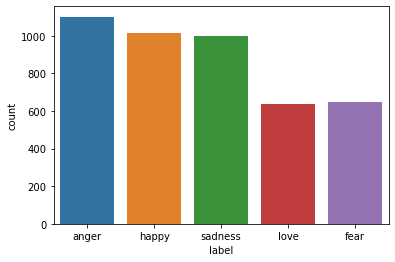

In [6]:
sns.countplot(x='label', data=df)

In [8]:
import re
#case Folding
def casefolding (text):
    text = text.lower()
    text = re.sub(r'http?://\S+|www\.\S+','',text)
    text = re.sub(r'[-+]?[0-9]+','', text)
    text = re.sub(r'[^\w\s]','', text)
    text = text.strip()
    return text

In [9]:
raw_sample = df['tweet'].iloc[100]
case_folding = casefolding(raw_sample)

print("Raw Data\t:", raw_sample)
print('\n\nCase folding\t:', case_folding)


Raw Data	: [USERNAME] saya kan datang untuk bertanya, kemudian ngobrol tuh sama mba mba Help desk. tapi saya tetep ga ngerti karena ga dapet jawaban yg menjawab pertanyaan saya. trus mbanya lama lama agak emosi, yaudah makin ga kejawab dong, trus saya pulang.


Case folding	: username saya kan datang untuk bertanya kemudian ngobrol tuh sama mba mba help desk tapi saya tetep ga ngerti karena ga dapet jawaban yg menjawab pertanyaan saya trus mbanya lama lama agak emosi yaudah makin ga kejawab dong trus saya pulang


In [14]:
from nltk.corpus import stopwords
stopwords_ind = stopwords.words('indonesian')
len(stopwords_ind)

758

In [15]:
stopwords_ind

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [19]:
from bleach import clean


more_stopword = ['ah', 'gaes', 'äú', 'yuk', 'klo', 'mending', 'yg', 'hip', 'ayo']
stopwords_ind = stopwords_ind + more_stopword

def remove_stop_words(text):
    clean_words = []
    text = text.split()
    for word in text:
        if word not in stopwords_ind:
            clean_words.append(word)
    return " ".join(clean_words)

In [20]:
raw_sample = df['tweet'].iloc[5]
case_folding = casefolding(raw_sample)
stopwords_removal = remove_stop_words(case_folding)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)
print('\n\nStopword removal\t: ', stopwords_removal)

Raw data	:  Dari sekian banyak thread yang aku baca, thread ini paling aneh sih dalam penulisan. Sumpah aneh bgt, mau ngatain "lebay" aja segala bikin thread hadeh. Aku juga ga jago nulis, tapi tulisan aku ga seberantakan thread mbaknya.


Case folding	:  dari sekian banyak thread yang aku baca thread ini paling aneh sih dalam penulisan sumpah aneh bgt mau ngatain lebay aja segala bikin thread hadeh aku juga ga jago nulis tapi tulisan aku ga seberantakan thread mbaknya


Stopword removal	:  sekian thread baca thread aneh sih penulisan sumpah aneh bgt ngatain lebay aja bikin thread hadeh ga jago nulis tulisan ga seberantakan thread mbaknya


In [21]:
#Steaming
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory as SF

factory = SF()
stemmer = factory.create_stemmer()

def stemming(text):
    text = stemmer.stem(text)
    return text

In [23]:
raw_sample = df['tweet'].iloc[5]
case_folding = casefolding(raw_sample)
stopwords_removal = remove_stop_words(case_folding)
text_stemming = stemming(stopwords_removal)

print('Raw data\t: ', raw_sample)
print('\n\nCase folding\t: ', case_folding)
print('\n\nStopword removal\t: ', stopwords_removal)
print('\n\nStemming\t: ', text_stemming)

Raw data	:  Dari sekian banyak thread yang aku baca, thread ini paling aneh sih dalam penulisan. Sumpah aneh bgt, mau ngatain "lebay" aja segala bikin thread hadeh. Aku juga ga jago nulis, tapi tulisan aku ga seberantakan thread mbaknya.


Case folding	:  dari sekian banyak thread yang aku baca thread ini paling aneh sih dalam penulisan sumpah aneh bgt mau ngatain lebay aja segala bikin thread hadeh aku juga ga jago nulis tapi tulisan aku ga seberantakan thread mbaknya


Stopword removal	:  sekian thread baca thread aneh sih penulisan sumpah aneh bgt ngatain lebay aja bikin thread hadeh ga jago nulis tulisan ga seberantakan thread mbaknya


Stemming	:  sekian thread baca thread aneh sih tulis sumpah aneh bgt ngatain lebay aja bikin thread hadeh ga jago nulis tulis ga beranta thread mbak


In [31]:
#Text_Pipeline
def text_preprosessing_process(text):
    text = casefolding(text)
    text = remove_stop_words(text)
    text = stemming(text)
    return text

In [32]:
import swifter

In [33]:
%%time
df['clean_text'] = df['tweet'].swifter.apply(text_preprosessing_process)


Pandas Apply:   0%|          | 0/4401 [00:00<?, ?it/s]

CPU times: total: 1.33 s
Wall time: 3.93 s


In [34]:
df

,label,tweet,clean_text
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",jln jatibarupolisi tdk bs gertak gubernur eman...
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",cewe lho kayak rasain sibuk jaga rasain sakit ...
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,kepingin gudeg mbarek bu hj amad foto google s...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",jln jatibarubagian wilayah tn abangpengaturan ...
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata...",sharing alam aja kemarin jam batalin tiket sta...
...,...,...,...
4396,love,"Tahukah kamu, bahwa saat itu papa memejamkan m...",tahu papa mejam mata tahan gejolak batin papa ...
4397,fear,Sulitnya menetapkan Calon Wapresnya Jokowi di ...,sulit tetap calon wapresnya jokowi pilpres sal...
4398,anger,"5. masa depannya nggak jelas. lha iya, gimana ...",depan nggak lha iya gimana coba lulus seni bis...
4399,happy,[USERNAME] dulu beneran ada mahasiswa Teknik U...,username beneran mahasiswa teknik ui nembak pa...


In [35]:
#Feature & label
xfeatures = df['clean_text']
ylabel = df['label']

In [36]:
#spit data
x_train, x_test, y_train, y_test = train_test_split(xfeatures,ylabel,test_size=0.3,random_state=42)

In [61]:
#Pipeline
from sklearn.pipeline import Pipeline
model = Pipeline(steps=[('cv',CountVectorizer()), ('lr',LogisticRegression())])

In [62]:
#Train and fit
model.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [63]:
model

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [64]:
model.score(x_test,y_test)

0.6336109008327026

In [65]:
contoh = "gua sebel bet ama kau"
model.predict([contoh])

array(['anger'], dtype=object)

In [66]:
model.predict_proba([contoh])

array([[0.3941831 , 0.05280769, 0.18782481, 0.11786202, 0.24732237]])

In [67]:
model.classes_

array(['anger', 'fear', 'happy', 'love', 'sadness'], dtype=object)

In [60]:
import pickle
with open('model.pkl','wb') as files:
    pickle.dump(model, files)